![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Customer Analysis Final Round

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

### 01 - Problem (case study)

- Data Description.
- Goal.

### 02 - Getting Data

- Read the `.csv` file.

### 03 - Cleaning/Wrangling/EDA

- Change headers names.
- Deal with NaN values.
- Categorical Features.
- Numerical Features.
- Exploration.

### 04 - Processing Data

- Dealing with outliers.
- Normalization.
- Encoding Categorical Data.
- Splitting into train set and test set.

### 05 - Modeling

- Apply model.

### 06 - Model Validation

- R2.
- MSE.
- RMSE.
- MAE.

### 07 - Reporting

- Present results.


## Import all libraries

In [295]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import tree
from sklearn import ensemble
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier


## Import Data and check info

In [296]:
marketing_customer_analysis = pd.read_csv("files_for_lab/marketing_customer_analysis.csv")
marketing_customer_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

## Check correlations for numeric data to remove

### Pearson Correlation

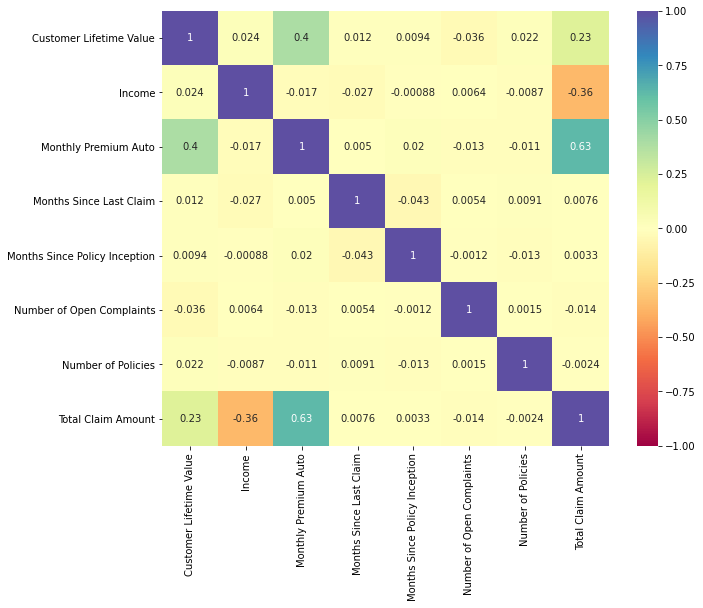

In [297]:
corr_pearson = marketing_customer_analysis.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_pearson, annot=True,vmax=1,vmin=-1,cmap="Spectral")
plt.show()

### Spearman Correlation

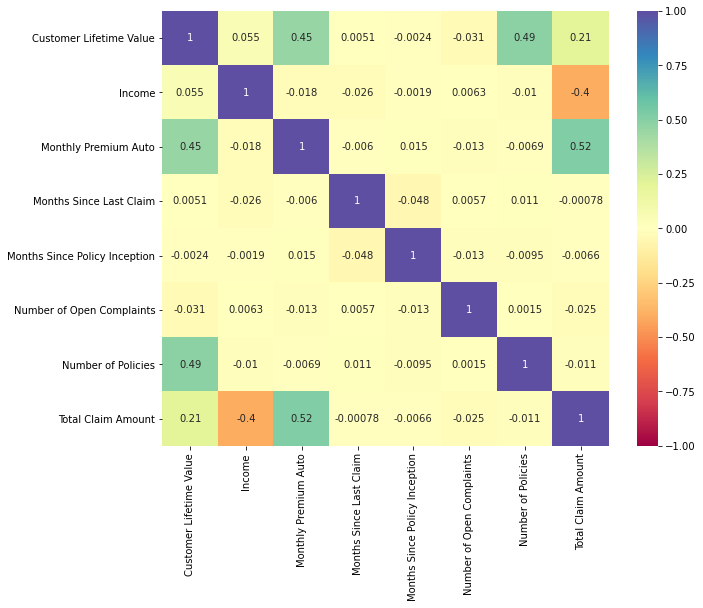

In [298]:
corr_spearman = marketing_customer_analysis.corr(method='spearman')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_spearman, annot=True,vmax=1,vmin=-1,cmap="Spectral")
plt.show()

### Kendall Correlation

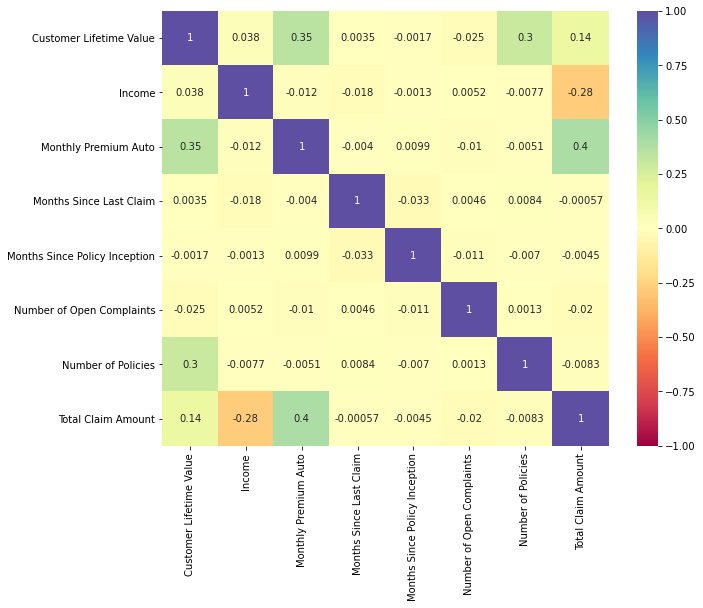

In [299]:
corr_kendall = marketing_customer_analysis.corr(method='kendall')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_kendall, annot=True,vmax=1,vmin=-1,cmap="Spectral")
plt.show()

# Dropping

Dropping all features that have a correlation [ -0.2 , 0.2 ] with the variable ["Total Claim amount"]

Also consider dropping ["Customer Lifetime Value"] as it has a strong correlation (but not over 0.75) with another featue, ["Monthly Premium Auto"], as this feature has a stronger correlation with the variable.

Also drop the ["Customer"] and ["Effective To Date"] columns as this does not contribute to the model.

In [300]:
numerical_cols_to_drop = ['Months Since Last Claim',
                          'Months Since Policy Inception',
                          'Number of Open Complaints',
                          'Number of Open Complaints',
                          'Number of Policies']

corr_marketing_customer_analysis = marketing_customer_analysis.drop(numerical_cols_to_drop,axis=1)

## Check if datawas removed properly

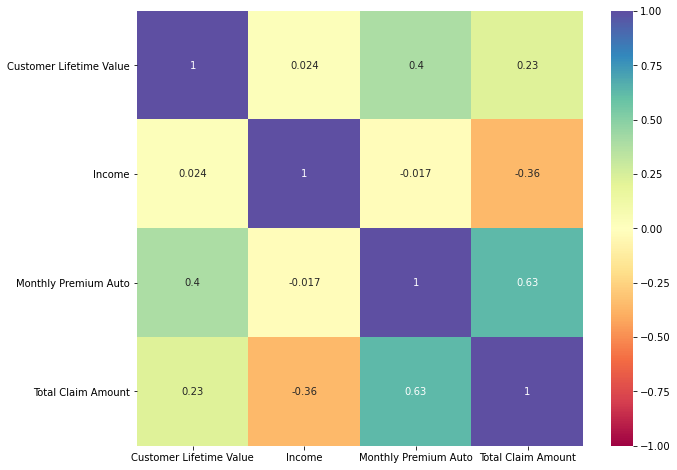

In [301]:
corr_pearson = corr_marketing_customer_analysis.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_pearson, annot=True,vmax=1,vmin=-1,cmap="Spectral")
plt.show()

## Look for outliers

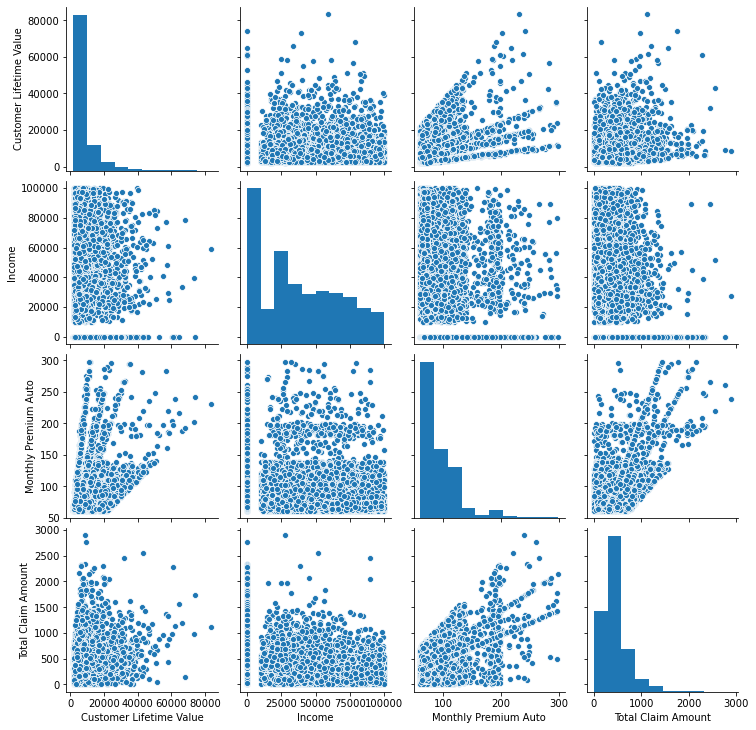

In [302]:
num_cols = list(corr_marketing_customer_analysis.columns)
sns.pairplot(corr_marketing_customer_analysis[num_cols])
plt.show()

## Look for whiskers to remove

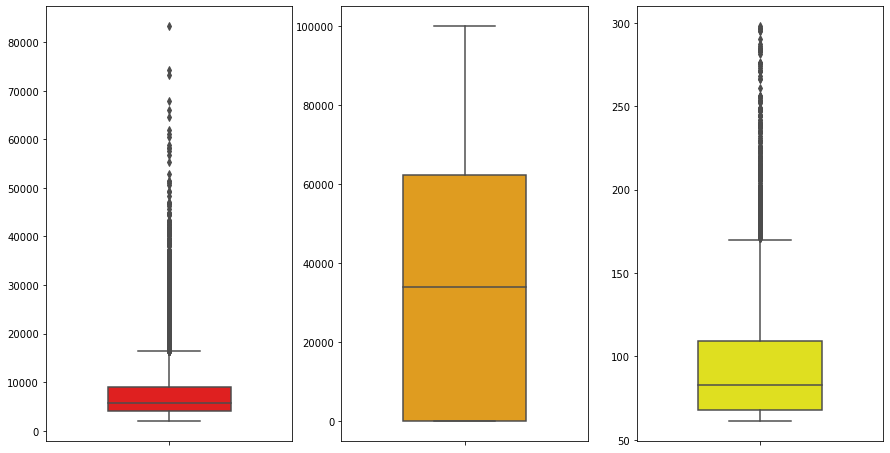

In [303]:
df = corr_marketing_customer_analysis

col_0 = ['Customer Lifetime Value']
col_1 = ['Income']
col_2 = ['Monthly Premium Auto']

fig, ax = plt.subplots(figsize=(15, 8),)

plt.subplot(131)
sns.boxplot(y=col_0,data=df,color="red",width=0.5)
plt.subplot(132)
sns.boxplot(y=col_1,data=df,color="orange",width=0.5)
plt.subplot(133)
sns.boxplot(y=col_2,data=df,color="yellow",width=0.5)

plt.show()

In [304]:
customer_value = corr_marketing_customer_analysis[["Customer Lifetime Value"]]

value1 = customer_value.quantile(0.25)-1.5*(customer_value.quantile(0.75) - customer_value.quantile(0.25))
value2 = customer_value.quantile(0.75)+1.5*(customer_value.quantile(0.75) - customer_value.quantile(0.25))
value1 = value1[0]
value2 = value2[0]

In [305]:
new = corr_marketing_customer_analysis[(corr_marketing_customer_analysis["Customer Lifetime Value"]> value1 )&( corr_marketing_customer_analysis["Customer Lifetime Value"]<value2)]
new.reset_index(drop=True,inplace=True)


In [306]:
monthly_prem = new[['Monthly Premium Auto']]

value1 = monthly_prem.quantile(0.25)-1.5*(monthly_prem.quantile(0.75) - monthly_prem.quantile(0.25))
value2 = monthly_prem.quantile(0.75)+1.5*(monthly_prem.quantile(0.75) - monthly_prem.quantile(0.25))
value1 = value1[0]
value2 = value2[0]

In [307]:
whisk_clean_data = corr_marketing_customer_analysis[(corr_marketing_customer_analysis['Monthly Premium Auto']> value1 )&( corr_marketing_customer_analysis['Monthly Premium Auto']<value2)]
whisk_clean_data.reset_index(drop=True,inplace=True)

## Remove Quantile whiskers

Only remove the upper "Customer lifetime value" and "Monthly premium auto" whiskers, We will normalize Income data later. 

Consider removing Incomes with zero as this might be a question unanswered by the clients

## Boxplot to check data

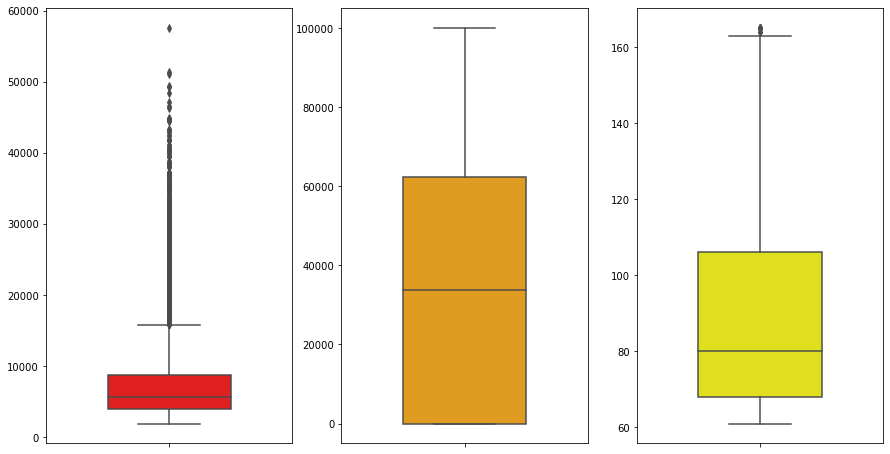

In [308]:
df = whisk_clean_data

col_0 = ['Customer Lifetime Value']
col_1 = ['Income']
col_2 = ['Monthly Premium Auto']

fig, ax = plt.subplots(figsize=(15, 8),)

plt.subplot(131)
sns.boxplot(y=col_0,data=df,color="red",width=0.5)
plt.subplot(132)
sns.boxplot(y=col_1,data=df,color="orange",width=0.5)
plt.subplot(133)
sns.boxplot(y=col_2,data=df,color="yellow",width=0.5)

plt.show()

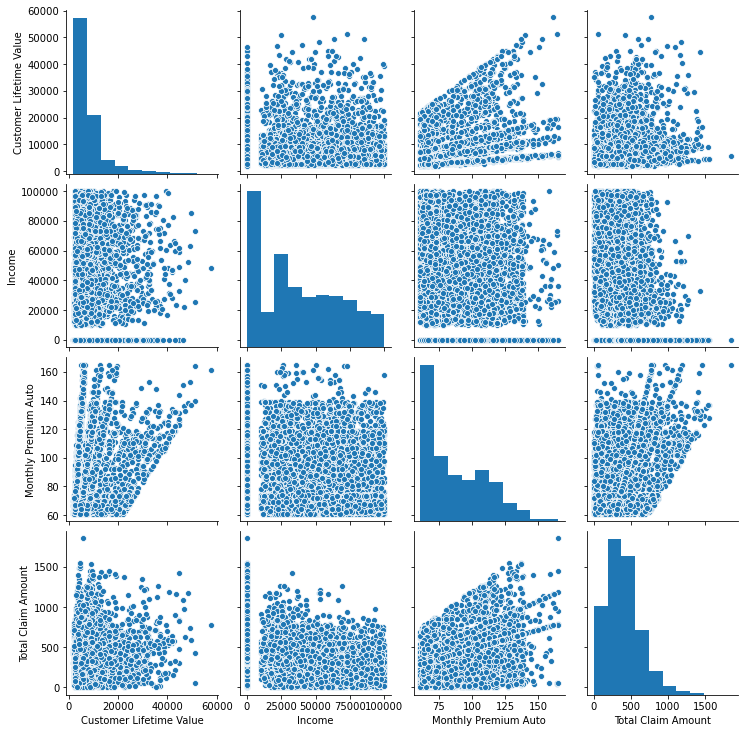

In [309]:
num_cols = list(whisk_clean_data.columns)
sns.pairplot(whisk_clean_data[num_cols])
plt.show()

## Seperate catagories and numerical features

In [310]:
num_marketing_customer_analysis = whisk_clean_data.select_dtypes(["int64","float"])
cat_marketing_customer_analysis = whisk_clean_data.select_dtypes("object")
cat_marketing_customer_analysis = cat_marketing_customer_analysis.drop(['Customer','Effective To Date'],axis=1)

## Remove the variable

In [311]:
y_variable = num_marketing_customer_analysis['Total Claim Amount']
xt_marketing_customer_analysis = num_marketing_customer_analysis.drop(['Total Claim Amount'],axis=1)

## Normalize the data

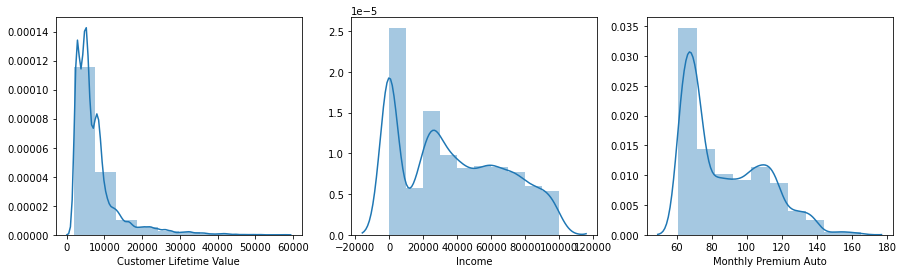

In [312]:
df = xt_marketing_customer_analysis
cols = xt_marketing_customer_analysis.columns

col_1 = cols[0]
col_2 = cols[1]
col_3 = cols[2]

fig, ax = plt.subplots(figsize=(15, 4),)

plt.subplot(131)
sns.distplot(df[col_1],bins=10)
plt.subplot(132)
sns.distplot(df[col_2],bins=10)
plt.subplot(133)
sns.distplot(df[col_3],bins=10)

plt.show()

In [313]:
xt_marketing_customer_analysis['Income'] = xt_marketing_customer_analysis['Income'].add(1)

xt_marketing_customer_analysis['Customer Lifetime Value_xt'], lmbda = stats.boxcox(xt_marketing_customer_analysis['Income'])
xt_marketing_customer_analysis['Income_xt'], lmbda = stats.boxcox(xt_marketing_customer_analysis['Income'])
xt_marketing_customer_analysis['Monthly Premium Auto_xt'], lmbda = stats.boxcox(xt_marketing_customer_analysis['Income'])


xt_marketing_customer_analysis = xt_marketing_customer_analysis.drop(['Customer Lifetime Value','Income','Monthly Premium Auto'],axis=1)


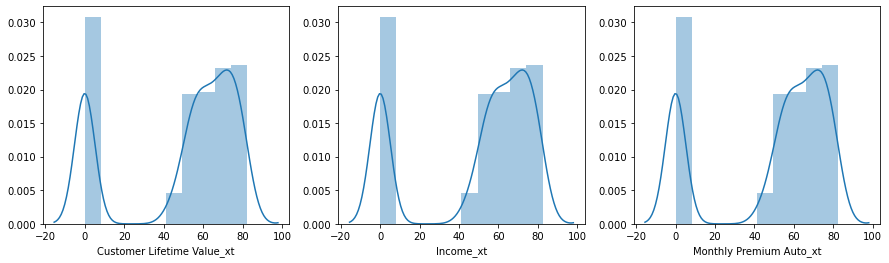

In [314]:
df = xt_marketing_customer_analysis
cols = xt_marketing_customer_analysis.columns

col_1 = cols[0]
col_2 = cols[1]
col_3 = cols[2]

fig, ax = plt.subplots(figsize=(15, 4))

plt.subplot(131)
sns.distplot(df[col_1],bins=10)
plt.subplot(132)
sns.distplot(df[col_2],bins=10)
plt.subplot(133)
sns.distplot(df[col_3],bins=10)

plt.show()

## One hot encode the catagories

In [315]:
for i in cat_marketing_customer_analysis:
    print('Catagory: ',i)
    print(cat_marketing_customer_analysis[i].value_counts())
    print('\n')
    

Catagory:  State
California    2999
Oregon        2463
Arizona       1625
Nevada         838
Washington     761
Name: State, dtype: int64


Catagory:  Response
No     7426
Yes    1260
Name: Response, dtype: int64


Catagory:  Coverage
Basic       5382
Extended    2629
Premium      675
Name: Coverage, dtype: int64


Catagory:  Education
Bachelor                2604
College                 2562
High School or Below    2489
Master                   698
Doctor                   333
Name: Education, dtype: int64


Catagory:  EmploymentStatus
Employed         5405
Unemployed       2207
Medical Leave     419
Disabled          380
Retired           275
Name: EmploymentStatus, dtype: int64


Catagory:  Gender
F    4444
M    4242
Name: Gender, dtype: int64


Catagory:  Location Code
Suburban    5442
Rural       1714
Urban       1530
Name: Location Code, dtype: int64


Catagory:  Marital Status
Married     5051
Single      2327
Divorced    1308
Name: Marital Status, dtype: int64


Catagory:  Poli

In [316]:
encoder = OneHotEncoder(drop='first').fit(cat_marketing_customer_analysis)
enc_data = encoder.transform(cat_marketing_customer_analysis).toarray()
OHE_objects_names = list(encoder.get_feature_names())


OHE_cat_marketing_customer_analysis = pd.DataFrame(enc_data,columns=OHE_objects_names)

In [317]:
X_processed = pd.DataFrame()


OHE_cols_to_add = list(OHE_cat_marketing_customer_analysis.columns)
NUM_cols_to_add = list(xt_marketing_customer_analysis.columns)

for i in OHE_cols_to_add:
    X_processed[i] = OHE_cat_marketing_customer_analysis[i]
    
for i in NUM_cols_to_add:
    X_processed[i] = xt_marketing_customer_analysis[i]


In [318]:
X_train, X_test, y_train, y_test = train_test_split(X_processed,
                                                    y_variable,
                                                    test_size=0.3,
                                                    random_state=100)

In [319]:
reg = LinearRegression()
reg_model = reg.fit(X_train,y_train)
pred = reg_model.predict(X_test)
print("Linear Regression")
print('r2_score: ',r2_score(y_test,pred))
print('MSE:      ',mean_squared_error(y_test,pred,squared=True))
print('RMSE:     ',mean_squared_error(y_test,pred,squared=False))
print('MAE:      ',mean_absolute_error(y_test,pred))

tr = tree.DecisionTreeRegressor()
tr_model = tr.fit(X_train,y_train)
pred = tr_model.predict(X_test)
print("\n")
print("Decision Tree")
print('r2_score: ',r2_score(y_test,pred))
print('MSE:      ',mean_squared_error(y_test,pred,squared=True))
print('RMSE:     ',mean_squared_error(y_test,pred,squared=False))
print('MAE:      ',mean_absolute_error(y_test,pred))

Linear Regression
r2_score:  0.7344680742592613
MSE:       13788.875496158314
RMSE:      117.4260426658342
MAE:       86.66600513973403


Decision Tree
r2_score:  0.5987978460425865
MSE:       20834.129584518585
RMSE:      144.3403255660683
MAE:       91.14570042242262


Removing the whiskers reduced the r2 score by 3%

## Renormalize the data

In [327]:
norm_marketing_customer_analysis = num_marketing_customer_analysis[['Customer Lifetime Value','Income','Monthly Premium Auto']]

transformer = StandardScaler().fit(norm_marketing_customer_analysis)
X_standardized = transformer.transform(norm_marketing_customer_analysis)


X_standardized = pd.DataFrame(X_standardized,columns=[list(norm_marketing_customer_analysis.columns)])


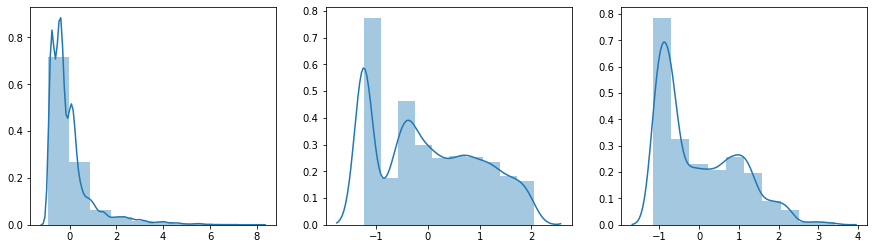

In [335]:
fig, ax = plt.subplots(figsize=(15, 4),)


plt.subplot(131)
sns.distplot(X_standardized[['Customer Lifetime Value']],bins=10)
plt.subplot(132)
sns.distplot(X_standardized[['Income']],bins=10)
plt.subplot(133)
sns.distplot(X_standardized[['Monthly Premium Auto']],bins=10)

plt.show()

In [336]:
X_processed_new = pd.DataFrame()


OHE_cols_to_add = list(OHE_cat_marketing_customer_analysis.columns)
NUM_cols_to_add = list(df_x_standardized.columns)

for i in OHE_cols_to_add:
    X_processed_new[i] = OHE_cat_marketing_customer_analysis[i]
    
for i in NUM_cols_to_add:
    X_processed_new[i] = df_x_standardized[i]

In [337]:
X_train, X_test, y_train, y_test = train_test_split(X_processed,
                                                    y_variable,
                                                    test_size=0.3,
                                                    random_state=100)

In [338]:
reg = LinearRegression()
reg_model = reg.fit(X_train,y_train)
pred = reg_model.predict(X_test)
print("Linear Regression")
print('r2_score: ',r2_score(y_test,pred))
print('MSE:      ',mean_squared_error(y_test,pred,squared=True))
print('RMSE:     ',mean_squared_error(y_test,pred,squared=False))
print('MAE:      ',mean_absolute_error(y_test,pred))

tr = tree.DecisionTreeRegressor()
tr_model = tr.fit(X_train,y_train)
pred = tr_model.predict(X_test)
print("\n")
print("Decision Tree")
print('r2_score: ',r2_score(y_test,pred))
print('MSE:      ',mean_squared_error(y_test,pred,squared=True))
print('RMSE:     ',mean_squared_error(y_test,pred,squared=False))
print('MAE:      ',mean_absolute_error(y_test,pred))

Linear Regression
r2_score:  0.7344680742592613
MSE:       13788.875496158314
RMSE:      117.4260426658342
MAE:       86.66600513973403


Decision Tree
r2_score:  0.5766956129969468
MSE:       21981.882114852615
RMSE:      148.26288178385246
MAE:       92.96500767498081
